<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:serif; text-align:center">
<span style="width:49%; display:inline-block; text-align:left"></span>
<span style="width:49%; display:inline-block; text-align:right"></span>
<span style="font-size:48px; font-style:normal"><b>stroke analysis and prediction</b></span><br>

# Introduction
## Description of the dataset : 
A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.


According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.


This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

## Attribute Information : 
* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient*

## Source : 
The dataset is associated with a research paper which is based on the Electronic Health Record (EHR) controlled by McKinsey & Company.[Click here: McKinsey Analytics Online Hackathon - Healthcare Analytics](https://datahack.analyticsvidhya.com/contest/mckinsey-analytics-online-hackathon/#About)<br>

The study : [please click here :IEEE Xplore-Text PDF](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9264165)<br>

The true source of the data is confidential, giving the sensitive content. The data is only for educational purposes.

The goal of our project is to predict whether an individual will suffer a stroke or not, by building multiple models and choosing the best performing one.
To help us find the variables that are most indicative of the possibility of having a stroke or not, we will perform multiple data visualizations.
And after that we will build our models and evaluate their performance to choose the best one in the end.

>To accomplish this, we will proceed by the following steps : 
>1. Finding the missing data and dealing with it.
>2. We will explore our data using visualizations to answer questions like, what variable makes a person more likely to suffer from a stroke ?
>3. We will try to extract insights from the previous step, that will help us understand the data more.
>4. Plotting all the variables to get a general overview, to find interesting trends and features of the data.
>5. We will construct our predictive model, using a random forest model and a logistic regression model.
>6. In the end, we will choose the model with the best accuracy.

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b> Importing all the necessary libraries for processing and exploring the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.ticker as mtick

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b> Importing the data </b></span>

In [5]:
# Importing data
data = pd.read_csv('Stroke Prediction Dataset.csv')

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b> Taking a look at the data </b></span>

In [6]:
# Seeing the first 10 rows of the data
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [7]:
# shape of our data (5110 rows and 12 column)
data.shape

(5110, 12)

In [8]:
# checking Data type of each column 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# Descriptive statistiques of the data
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [29]:
# counting the values of each level from the gender column.
data.gender.value_counts(normalize=False)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
# droping the Other observation.
data = data[data.gender != 'Other'] 

In [11]:
# counting the values of each level from the ever_married column.
data.ever_married.value_counts(normalize=False) 

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [22]:
# counting the values of each level from the work_type column.
data.work_type.value_counts(normalize=False) 

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [23]:
# counting the values of each level from the smoking_status column.
data.smoking_status.value_counts(normalize=False) 

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b>Dealing with missing values</b></span>

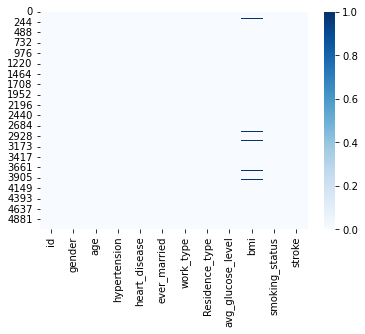

In [12]:
# Creating a heatmap of the missing values
sns.heatmap(data.isnull(),cmap = 'Blues');

***We notice that we have some missing values in the variable bmi***

In [13]:
#sum of missing values per variable.
data.isna().sum()  

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

***The Number of Missing Values in bmi: 201***

In [14]:
#filling the  missing values in bmi column with the mean of bmi values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data['bmi'] = imp_mean.fit_transform(data['bmi'].values.reshape(-1,1)) 

In [15]:
# Checking if there is still any missing values
data.isna().sum()   

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

***We can see that the missing values no longer exist***

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b>Exploratory Data Analysis</b></span>

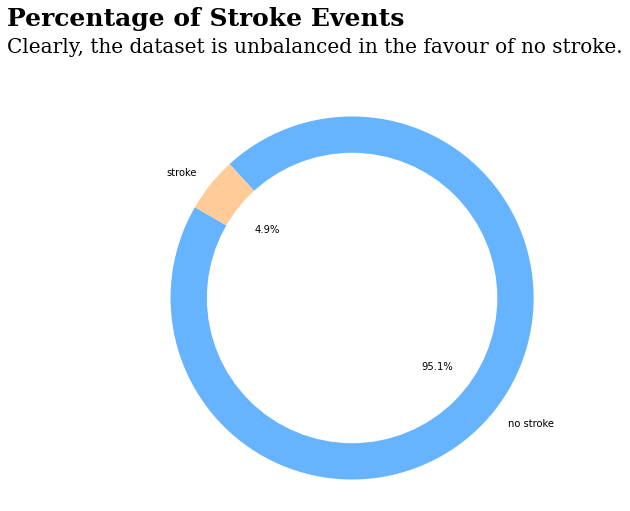

In [16]:
#Checking the percentages of stroke and no-stroke 

# Creating a data frame for the piechart
PieData = pd.DataFrame(data.groupby('stroke')['stroke'].count())

# Creating labels and colors
labels=['no stroke','stroke']
colors = ['#66b3ff','#ffcc99']

# Creating a figure
fig1, ax1 = plt.subplots(figsize= (6,6))

# Creating the piechart
ax1.pie(PieData['stroke'], colors = colors, labels=labels, autopct='%1.1f%%', startangle=150)

# Creating a white circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Positioning the circle
ax1.axis('equal')  
plt.tight_layout()

# Creating the titles and comments
ax1.text(-1.9, 1.5, 'Percentage of Stroke Events', fontsize=25, fontweight='bold', fontfamily='serif')
ax1.text(-1.9, 1.35, 'Clearly, the dataset is unbalanced in the favour of no stroke.', fontsize=20, fontfamily='serif')

plt.show()

***The data is hugely biased towards no stroke with a ratio of 19:1***

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b>Distribution of numerical variables </b></span>

<Figure size 1440x360 with 0 Axes>

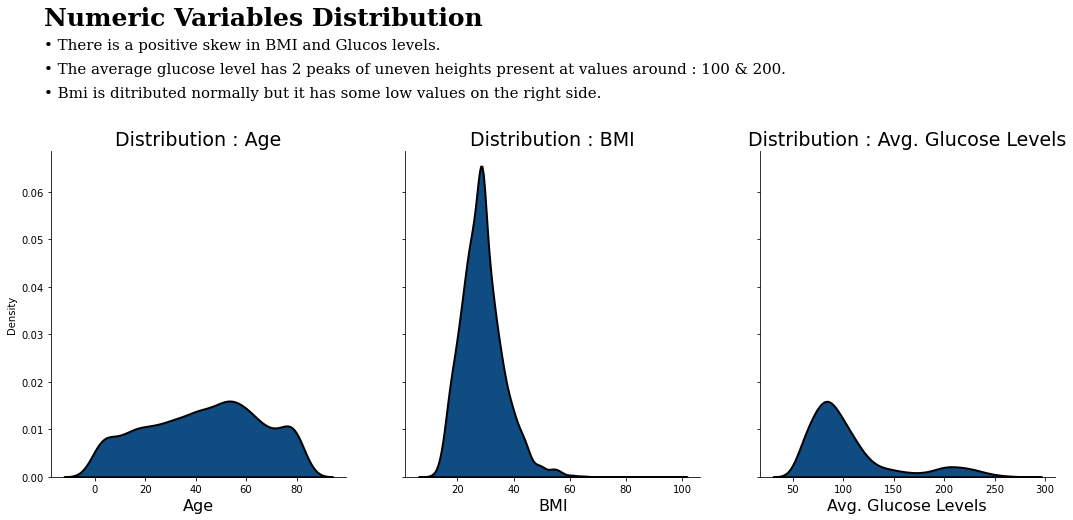

In [17]:
# Plotting the distribution of each of the numerical variables

# Creating the figures
plt.figure(figsize=(20,5))
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True,figsize=(18, 6))

# Removing spines
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

# Creating a density plot of the variable age
sns.kdeplot(data['age'], ax=ax1, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
ax1.set_xlabel('Age', fontsize=16)
ax1.set_title('Distribution : Age', fontsize= 19)

# Creating a density plot of the variable bmi
sns.kdeplot(data['bmi'], ax=ax2, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
ax2.set_xlabel('BMI', fontsize=16)
ax2.set_title('Distribution : BMI', fontsize= 19)

# Creating a density plot of the variable avg_glucose_level
sns.kdeplot(data['avg_glucose_level'], ax=ax3, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
ax3.set_xlabel('Avg. Glucose Levels', fontsize=16)
ax3.set_title('Distribution : Avg. Glucose Levels', fontsize= 19)

# Creating the title and comments
ax1.text(-20, 0.095, 'Numeric Variables Distribution', fontsize=25, fontweight='bold', fontfamily='serif')
ax1.text(-20, 0.09, '• There is a positive skew in BMI and Glucos levels.', fontsize=15, fontfamily='serif')
ax1.text(-20, 0.085, '• The average glucose level has 2 peaks of uneven heights present at values around : 100 & 200.', fontsize=15, fontfamily='serif')
ax1.text(-20, 0.08, '• Bmi is ditributed normally but it has some low values on the right side.', fontsize=15, fontfamily='serif')

plt.show()

**We gained some understanding on the distributions of our numeric variables, but we can add more information to this plot by 
seeing how the distribution of our numeric variables is different for those that have strokes, and those that do not.**

<Figure size 1440x360 with 0 Axes>

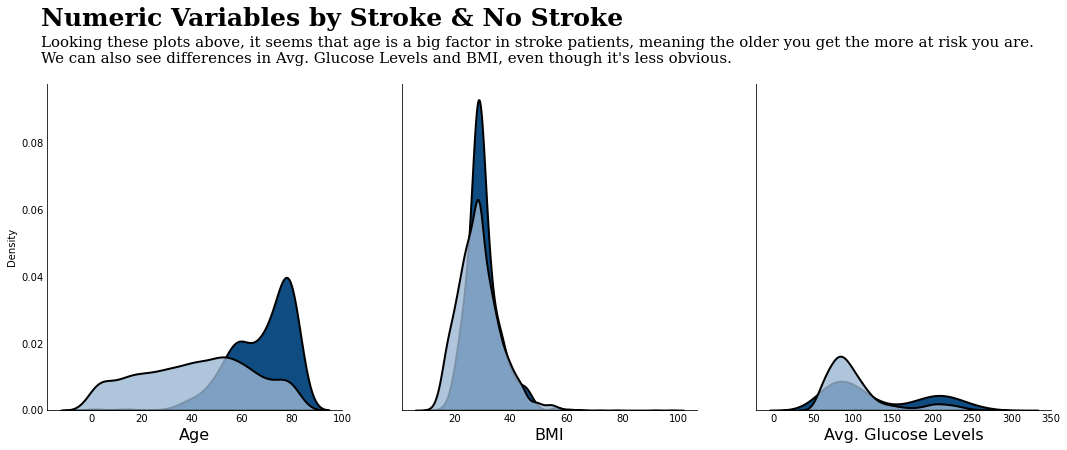

In [18]:
# Plotting the numerical variables against the variable stroke

# Creating the figures
plt.figure(figsize=(20,5))
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True,figsize=(18, 6))

# Removing spines
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)


# Removing ticks from the sides of the graphes 
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax3.tick_params(axis=u'both', which=u'both',length=0)

# Splitting the variable stroke into stroke and no stroke
stroke = data[data['stroke'] == 1]
no_stroke = data[data['stroke'] == 0]

# Creating a density plots
sns.kdeplot(stroke['age'], ax = ax1, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
sns.kdeplot(no_stroke['age'], ax = ax1, color='#9bb7d4',shade=True, linewidth=2, ec='black', alpha=0.8)
ax1.set_xlabel('Age', fontsize=16)


sns.kdeplot(stroke['bmi'], ax = ax2, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
sns.kdeplot(no_stroke['bmi'], ax = ax2, color='#9bb7d4',shade=True, linewidth=2, ec='black', alpha=0.8)
ax2.set_xlabel('BMI', fontsize=16)

sns.kdeplot(stroke['avg_glucose_level'], ax = ax3, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
sns.kdeplot(no_stroke['avg_glucose_level'], ax = ax3, color='#9bb7d4',shade=True, linewidth=2, ec='black', alpha=0.8)
ax3.set_xlabel('Avg. Glucose Levels', fontsize=16)

# Creating the title 
ax1.text(-20, 0.115, 'Numeric Variables by Stroke & No Stroke', fontsize=25, fontweight='bold', fontfamily='serif')
ax1.text(-20, 0.104, "Looking these plots above, it seems that age is a big factor in stroke patients, meaning the older you get the more at risk you are. \nWe can also see differences in Avg. Glucose Levels and BMI, even though it's less obvious.", 
         fontsize=15, fontfamily='serif')

plt.show()

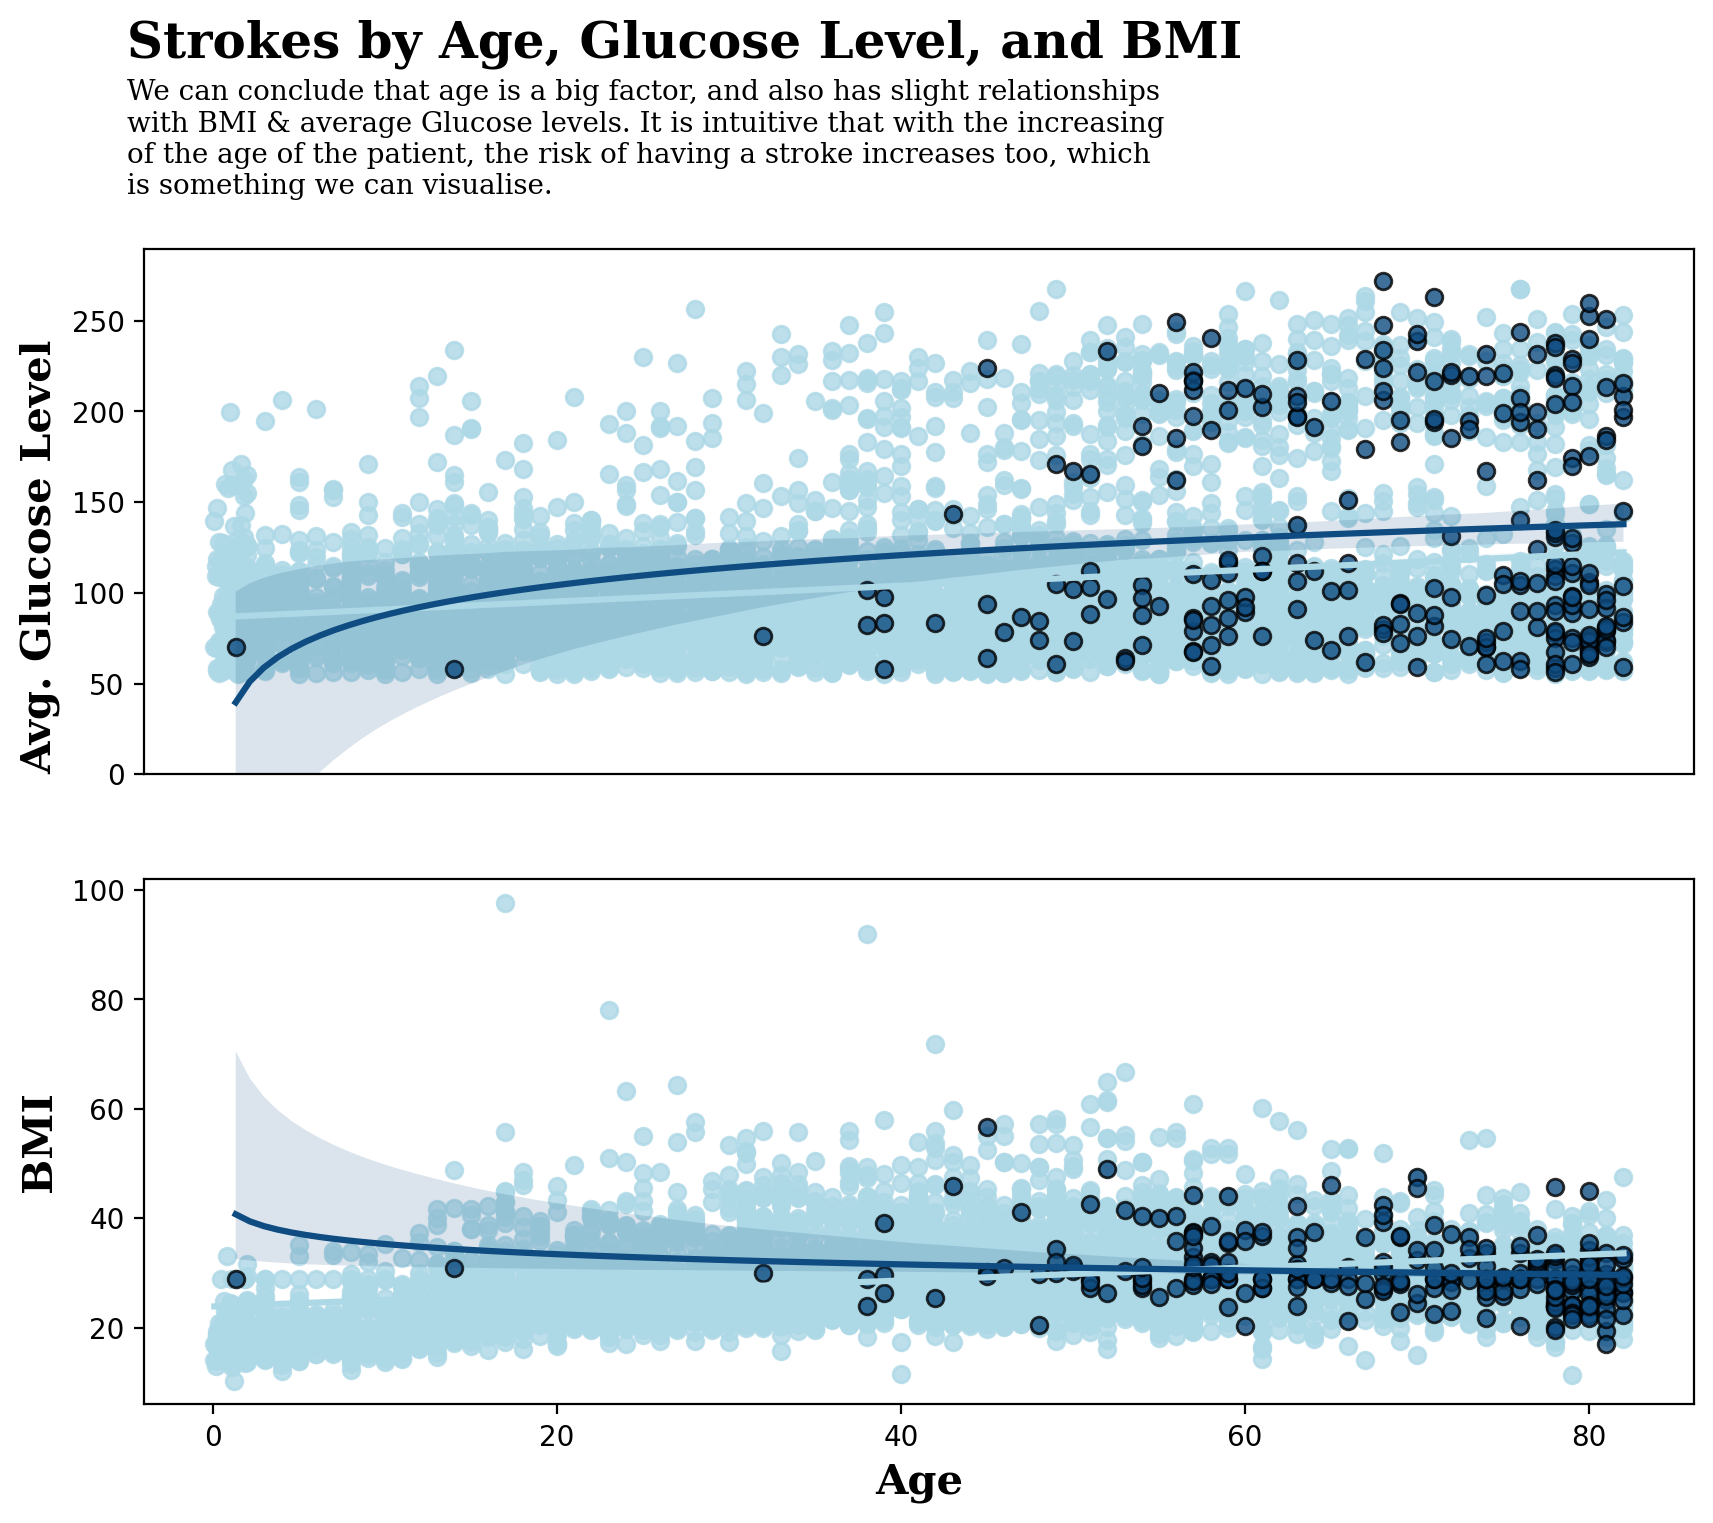

In [19]:
# Plotting the relationship between the numerical variables and stroke with a regression plot

# Preparing the data
stroke_only = data[data['stroke'] == 1]
no_stroke_only = data[data['stroke'] == 0]

# Creating the figures
fig = plt.figure(figsize=(10,16),dpi=200) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1, 0:2]) 

# Creating the regression plot of age and avg_glucose_level with stroke
sns.regplot(x = no_stroke_only['age'], y = no_stroke_only['avg_glucose_level'], ax = ax1, color='lightblue')
sns.regplot(x = stroke_only['age'], y = stroke_only['avg_glucose_level'], ax = ax1,
            color='#0f4c81', logx=True,
            scatter_kws={'edgecolors':['black'],
            'linewidth': 1},)

# Renaming the x and y labels
ax1.set(ylim=(0, None))
ax1.set_xlabel("Age",fontsize=12,fontfamily='serif')
ax1.set_ylabel("Avg. Glucose Level",fontsize=15,fontfamily='serif',loc='bottom',fontweight='bold')

# Removing ticks from the graphs
ax1.tick_params(axis='x', bottom=False)
ax1.get_xaxis().set_visible(False)

# Creating the regression plot of age and bmi with stroke
sns.regplot(x = no_stroke_only['age'], y = no_stroke_only['bmi'], ax = ax2, color='lightblue')
sns.regplot(x = stroke_only['age'], y = stroke_only['bmi'], ax = ax2,
            color='#0f4c81', logx=True,
            scatter_kws={'edgecolors':['black'],
            'linewidth': 1},)

# Renaming the x and y labels
ax2.set_xlabel("Age",fontsize=15,fontfamily='serif',loc='center', fontweight='bold')
ax2.set_ylabel("BMI",fontsize=15,fontfamily='serif',loc='center', fontweight='bold')

# Creating the title and comment
ax1.text(-5,395,'Strokes by Age, Glucose Level, and BMI',fontsize=18,fontfamily='serif',fontweight='bold')
ax1.text(-5,320,'We can conclude that age is a big factor, and also has slight relationships \nwith BMI & average Glucose levels. It is intuitive that with the increasing \nof the age of the patient, the risk of having a stroke increases too, which\nis something we can visualise.',
         fontsize=10,fontfamily='serif')

plt.show()

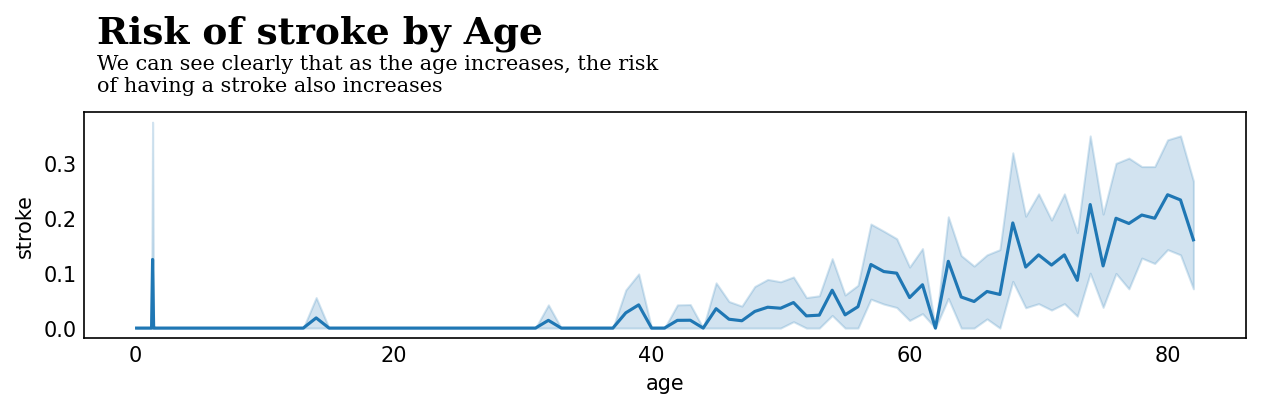

In [20]:
# Ploting age against the risk of a stroke

# Creating the figure
fig = plt.figure(figsize=(10, 5), dpi=150)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax1 = fig.add_subplot(gs[0, 0])

# Removing ticks
ax1.tick_params(axis=u'both', which=u'both',length=0)

# Creating a lineplot of age and stroke
sns.lineplot(x = data['age'],y  = data['stroke'], ax = ax1)

# Creating the title and comment
ax1.text(-3,0.52,'Risk of stroke by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax1.text(-3,0.43,'We can see clearly that as the age increases, the risk \nof having a stroke also increases',
         fontsize=10,fontfamily='serif')

plt.show()

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b>Correlation between variables </b></span>

## Reminder the expression of the correlation:

$$cor(x_i,y_i)=\frac{\frac{1}{n} \sum_{i=1}^n (x- \bar x_i)(y_i -\bar Y)}{\sqrt{s_x^2S_y^2}}$$

In [22]:
# Calculating the correlations
data.loc[:, ~ data.columns.isin(['id'])].corr()["stroke"]
data_corr = data.loc[:, ~data.columns.isin(['id'])].corr()
data_corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.325861,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.160151,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038865,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.168913,0.131991
bmi,0.325861,0.160151,0.038865,0.168913,1.000000,0.038917
stroke,0.245239,0.127891,0.134905,0.131991,0.038917,1.000000


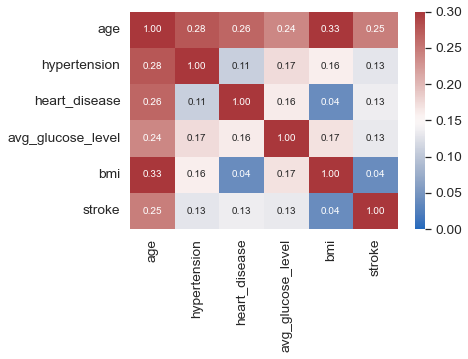

In [23]:
# The number of variables for the heatmap
k = 6 
# Scale of the heatmap
sns.set(font_scale=1.25)
# Creating the heatmap
sns.heatmap(data_corr, vmax=0.3, vmin=0, annot=True,  cmap='vlag',
                 fmt='.2f', annot_kws={'size': 10})
plt.show()

***The values presented in the heatmap doesn't indicate any strong relatioship between the variables, so we can't conclude any 
meaningful relationships***

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b>Distribution of categorical variables </b></span>

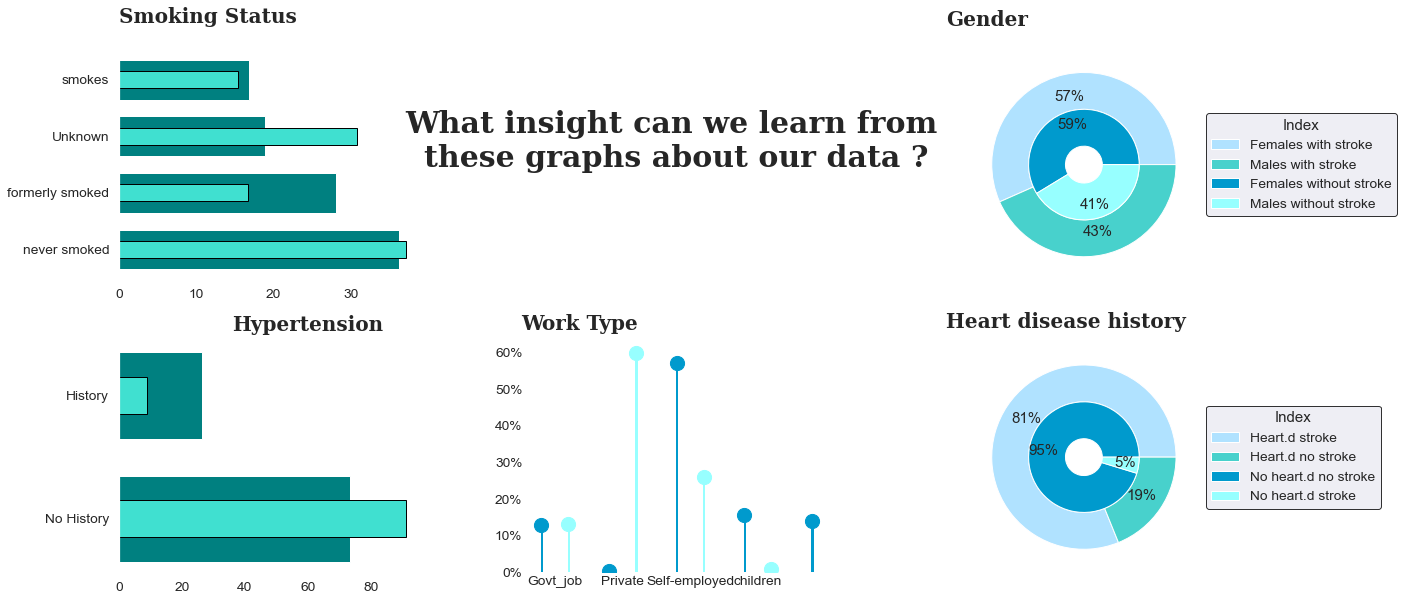

In [28]:
# Creating the figures needed
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

# Removing ticks
#ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax3.tick_params(axis=u'both', which=u'both',length=0)
#ax4.tick_params(axis=u'both', which=u'both',length=0)
ax5.tick_params(axis=u'both', which=u'both',length=0)
ax6.tick_params(axis=u'both', which=u'both',length=0)

############### the graph that compares the effect of smoking status on having a stroke or no ############### 

# The smokers who got a stroke
smokers_stroke = pd.DataFrame(stroke_only["smoking_status"].value_counts())
# smokers who did not get a stroke
smokers_no_stroke = pd.DataFrame(no_stroke_only["smoking_status"].value_counts())

# getting the percentage of each one for more accurate graphing
smokers_stroke["Percentage"] = smokers_stroke["smoking_status"].apply(lambda x: x/sum(smokers_stroke["smoking_status"])*100)
smokers_no_stroke["Percentage"] = smokers_no_stroke["smoking_status"].apply(lambda x: x/sum(smokers_no_stroke["smoking_status"])*100)

# Creating the graph
ax1.barh(smokers_stroke.index, smokers_stroke['Percentage'], color="teal", height=0.7)
ax1.barh(smokers_no_stroke.index, smokers_no_stroke['Percentage'], color="turquoise",ec='black', height=0.3)

# Creating title
ax1.text(0, 4, 'Smoking Status', fontsize=20, fontweight='bold', fontfamily='serif')

# Removing spines
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

############### the graph that compares the effect of gender on having a stroke or no ############### 
# Getting the percentages

gender_stroke = pd.DataFrame(stroke_only["gender"].value_counts())
gender_stroke["Percentage"] = gender_stroke["gender"].apply(lambda x: x/sum(gender_stroke["gender"])*100)
gender_no_stroke = pd.DataFrame(no_stroke_only["gender"].value_counts())
gender_no_stroke["Percentage"] = gender_no_stroke["gender"].apply(lambda x: x/sum(gender_no_stroke["gender"])*100)

# Size and labels of the piechart
size = 0.4
labels = ('Females with stroke','Males with stroke', 'Females without stroke', 'Males without stroke')

# Choosing colors
outer_colors = ('#B0E2FF','#48D1CC')
inner_colors = ('#009ACD','#97FFFF')

# Creating the pies
ax3.pie(gender_stroke["Percentage"] , radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        colors=outer_colors, autopct='%1.0f%%', pctdistance=0.75, labeldistance=2)
ax3.pie(gender_no_stroke["Percentage"], radius=1-size, wedgeprops=dict(width=size, edgecolor='w'), 
        colors=inner_colors, autopct='%1.0f%%', pctdistance=0.75, labeldistance=2)
ax3.legend(labels, title="Index",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")
# Creating the title
ax3.text(-1.5, 1.5, 'Gender', fontsize=20, fontweight='bold', fontfamily='serif')

############### the graph that compares the effect of heart_disease on having a stroke or no ############### 
# Getting the percentages
stroke_heart_d = pd.DataFrame(stroke_only["heart_disease"].value_counts())
stroke_heart_d["Percentage"] = stroke_heart_d["heart_disease"].apply(lambda x: x/sum(stroke_heart_d["heart_disease"])*100)
no_stroke_heart_d = pd.DataFrame(no_stroke_only["heart_disease"].value_counts())
no_stroke_heart_d["Percentage"] = no_stroke_heart_d["heart_disease"].apply(lambda x: x/sum(no_stroke_heart_d["heart_disease"])*100)

# Size and labels of the piechart
size = 0.4
labels = ('Heart.d stroke', 'Heart.d no stroke','No heart.d no stroke','No heart.d stroke')

# Choosing colors
outer_colors = ('#B0E2FF','#48D1CC')
inner_colors = ('#009ACD','#97FFFF')

# Creating the pies
ax6.pie(stroke_heart_d["Percentage"], radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        colors=outer_colors, autopct='%1.0f%%', pctdistance=0.75, labeldistance=2)
ax6.pie(no_stroke_heart_d["Percentage"], radius=1-size, wedgeprops=dict(width=size, edgecolor='w'), 
        colors=inner_colors, autopct='%1.0f%%', pctdistance=0.75, labeldistance=2)
ax6.legend(labels, title="Index",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")

# Creating the title
ax6.text(-1.5, 1.4, 'Heart disease history', fontsize=20, fontweight='bold', fontfamily='serif')

############### the graph that compares the effect of hypertension on having a stroke or no ############### 
# Getting the percentages
stroke_HyperT = pd.DataFrame(stroke_only["hypertension"].value_counts())
stroke_HyperT["Percentage"] = stroke_HyperT["hypertension"].apply(lambda x: x/sum(stroke_HyperT["hypertension"])*100)
no_stroke_HyperT = pd.DataFrame(no_stroke_only["hypertension"].value_counts())
no_stroke_HyperT["Percentage"] = no_stroke_HyperT["hypertension"].apply(lambda x: x/sum(no_stroke_HyperT["hypertension"])*100)

# Creating the bars
y_labels = ['No History','History']
ax4.barh(y_labels, stroke_HyperT['Percentage'], color="teal", height=0.7)
ax4.barh(y_labels, no_stroke_HyperT['Percentage'], color="turquoise",ec='black', height=0.3)
labels=('Stroke, no stroke')

# Creating the title
ax3.text(-9.25, -1.8, 'Hypertension', fontsize=20, fontweight='bold', fontfamily='serif')

# Removing spines
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)


############### the graph that compares the effect of work type on having a stroke or no ############### 
# Getting the percentages
work_stroke = pd.DataFrame(stroke_only["work_type"].value_counts())
work_stroke["Percentage"] = work_stroke["work_type"].apply(lambda x: x/sum(work_stroke["work_type"])*100)
work_stroke = work_stroke.sort_index()
work_no_stroke = pd.DataFrame(no_stroke_only["work_type"].value_counts())
work_no_stroke["Percentage"] = work_no_stroke["work_type"].apply(lambda x: x/sum(work_no_stroke["work_type"])*100)
work_no_stroke = work_no_stroke.sort_index()

# Creating the graph
ax5.bar(work_no_stroke.index, height=work_no_stroke["Percentage"], zorder=3, color='#009ACD', width=0.05)
ax5.scatter(work_no_stroke.index, work_no_stroke["Percentage"], zorder=3,s=200, color='#009ACD')
ax5.bar(np.arange(len(work_stroke.index))+0.4, height=work_stroke["Percentage"], zorder=3, color='#97FFFF', width=0.05)
ax5.scatter(np.arange(len(work_stroke.index))+0.4, work_stroke["Percentage"], zorder=3,s=200, color='#97FFFF')

# Getting percentage on ticks
labels = list(work_stroke.index)
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.set_xticks(np.arange(len(work_stroke.index))+0.4 / 2)
ax5.set_xticklabels(labels )

# Removing spines
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)

# Creating the title
ax5.text(-0.3, 66, 'Work Type', fontsize=20, fontweight='bold', fontfamily='serif')

# Removing the lines from the middle grid
ax2.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

# Removing ticks and labels
ax2.tick_params(left=False, bottom=False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

# Removing grey background
ax1.set_facecolor('white')
ax2.set_facecolor('white')
ax4.set_facecolor('white')
ax5.set_facecolor('white')

# Title of the graph
ax2.text(0.5, 0.6, 'What insight can we learn from \nthese graphs about our data ?', horizontalalignment='center', verticalalignment='center',
         fontsize=30, fontweight='bold', fontfamily='serif')

plt.show()


***These are the insights we concluded :***

* **gender :** Female are more at risk than males.
* **hypertension :** A history of hypertension puts you more in risk of a stroke.
* **heart_disease :** A history of heart desease puts you more in risk of a stroke.
* **ever_married :** Makes no difference.
* **working_type :** Stress of the work can lead to stroke.
* **Residence_type :** Mortality due to stroke is higher in rural areas than urban areas.
* **smoking_status :** Smoking increases the risk of stroke.
* **age :** The chance of having a stroke about doubles every 10 years after age 55.
* **avg_glucose_level :** High blood glucose is found in stroke cases. A value of 126+ has been observed alot.
* **bmi :** High bmi values increases the chances of ischemic stroke.

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b> Creating the models </b></span>

*Giving that our datset is imbalanced (something that can effect the procuders that we will do leter), there is more negative instances of a stroke than the positive ones. We can handel this problem by using a method called SMOTE (Synthetic Minority Over-sampling Technique) to balance ou dataset.*

In [29]:
#First we need to encode categorical values
data['gender'] = data['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
data['Residence_type'] = data['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
data['work_type'] = data['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

In [59]:
# Importing the necessary libraries for the modeling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

In [11]:
# Importing the SMOTE fucntion
from imblearn.over_sampling import SMOTE

In [51]:
# Preparing our variables
X  = data[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = data['stroke']

# Seperating our data to train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

# Performing the SMOTE to balence our data
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

***Now that our data is balenced we can perform a cross-validation to evaluate our models performence on unseen data to make 
sure they will perform well on new data that's different from the data used to train the models and we will be cross-validating on 10 flods of the data***

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b> Performing a Cross-validation </b></span>

In [61]:
# We will use the function Pipeline to assemble the steps tha we'll be cross-validating
randf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

# Now we cross validate the models and compare the mean of their f1 scores
randf_crossv = cross_val_score(randf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
logreg_crossv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

# Getting the mean of the scores
randf_meanf1 = randf_crossv.mean()
logreg_meanf1 = logreg_crossv.mean()

# Printing the score to compare
print('Random Forest mean :',randf_meanf1)
print('Logistic Regression mean :',logreg_meanf1)

Random Forest mean : 0.9408586789816068
Logistic Regression mean : 0.8263329194238261


***Conclusions :***
* ***the f1 score is interpreted as the mean of the precision and recall of the model, meaning that a good f1 indecates that you have low false positives and low false negatives.***

* ***Giving the scores obtained, it seems like the Random Forest model performed better.***

* ***Now we will try the models on unseen data***

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b> Testing the models </b></span>

In [62]:
# Let's fit the train data to train our models
randf_pipeline.fit(X_train_resh,y_train_resh)
logreg_pipeline.fit(X_train_resh,y_train_resh)

# Predicting the test data
randf_pred   = randf_pipeline.predict(X_test)
logreg_pred   = logreg_pipeline.predict(X_test)

# A confusion matrix to see the results of the predictions
randf_confm  = confusion_matrix(y_test,randf_pred )
logreg_confm  = confusion_matrix(y_test,logreg_pred )

# Comparing the f1 scores obtained by the test data
randf_f1  = f1_score(y_test,randf_pred)
logreg_f1  = f1_score(y_test,logreg_pred)

# Printing the f1 scores to comprae again
print('Random Forest mean :',randf_f1)
print('Logistic Regression mean :',logreg_f1)

Random Forest mean : 0.17509727626459143
Logistic Regression mean : 0.19348837209302325


***They both scored very low with the test data, let's see why***

In [63]:
print(classification_report(y_test,randf_pred))
print(accuracy_score(y_test,randf_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      3404
           1       0.13      0.26      0.18       173

    accuracy                           0.88      3577
   macro avg       0.55      0.59      0.56      3577
weighted avg       0.92      0.88      0.90      3577

0.8814649147330165


In [64]:
print(classification_report(y_test,logreg_pred))
print(accuracy_score(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      3404
           1       0.12      0.60      0.19       173

    accuracy                           0.76      3577
   macro avg       0.54      0.68      0.53      3577
weighted avg       0.93      0.76      0.83      3577

0.7576181157394465


***Conclusions :***
* ***The Random forest model is more acurate with and accuracy of 0.87 over 0.76***
* ***On the other hand the LogReg model has a better f1 of 0.19 on the positive test, which is more important to us because we are trying to predict who will have a stroke.***
* ***Plus, LogReg has better recall than RandF which is more important.***

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b> Models comparaisons </b></span>

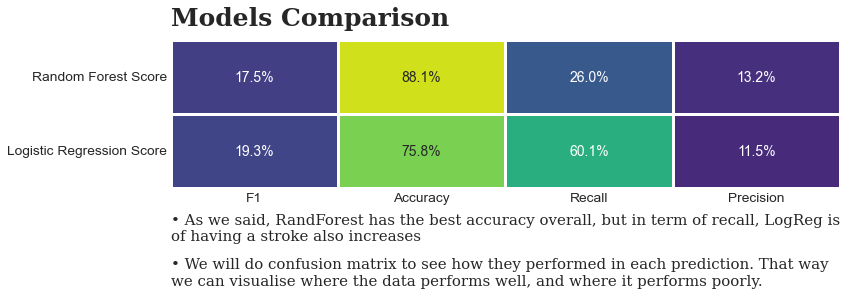

In [65]:
# Let's create dataframes to represent the results of our models in a graphe
randf_df = pd.DataFrame(data=[f1_score(y_test,randf_pred),accuracy_score(y_test, randf_pred), 
                        recall_score(y_test, randf_pred),precision_score(y_test, randf_pred)], 
                        columns=['Random Forest Score'],
                        index=["F1","Accuracy", "Recall", "Precision"])
logreg_df = pd.DataFrame(data=[f1_score(y_test,logreg_pred),accuracy_score(y_test, logreg_pred), 
                     recall_score(y_test, logreg_pred),precision_score(y_test, logreg_pred)], 
                     columns=['Logistic Regression Score'],
                     index=["F1","Accuracy", "Recall", "Precision"])

# Creating a data frame that contains both
df_models = round(pd.concat([randf_df,logreg_df], axis=1),3)

# Tansposing the dataframe
df_models = df_models.T

# Creating a figure
fig = plt.figure(figsize=(12,15)) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax1 = fig.add_subplot(gs[0, :])

# Removing ticks from the figure
ax1.tick_params(axis=u'both', which=u'both',length=0)

# Creating the heatmap
sns.heatmap(df_models, cmap='viridis',annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,
            cbar=False,ax=ax1,annot_kws={"fontsize":14})

# Title of the table and comments
ax1.text(0,-0.2,'Models Comparison',fontsize=25,fontweight='bold',fontfamily='serif')
ax1.text(0,2.7,'• As we said, RandForest has the best accuracy overall, but in term of recall, LogReg is \nof having a stroke also increases',
         fontsize=15,fontfamily='serif')
ax1.text(0,3.3,'• We will do confusion matrix to see how they performed in each prediction. That way \nwe can visualise where the data performs well, and where it performs poorly.',
         fontsize=15,fontfamily='serif')

plt.show()

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b> Confusion matrix </b></span>

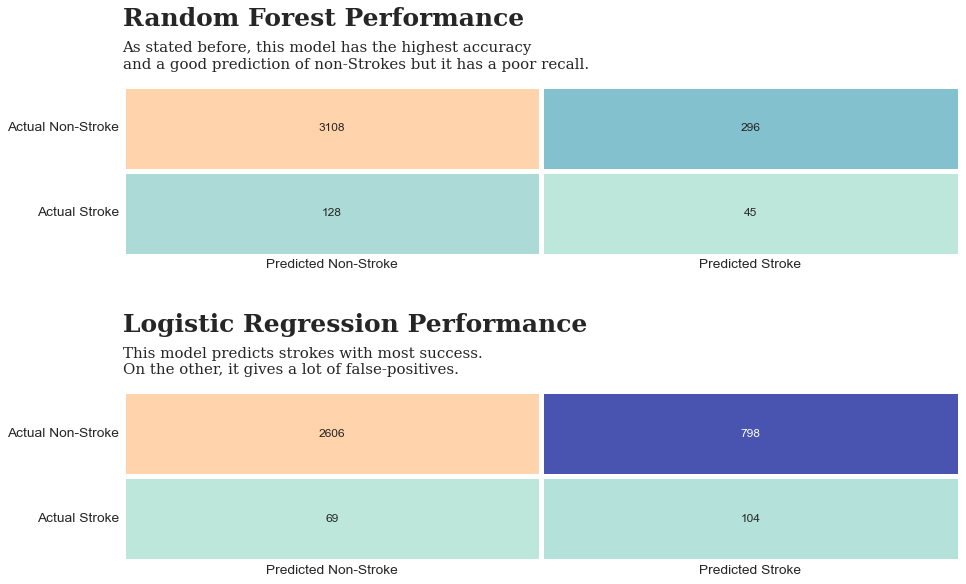

In [66]:
# Creating two figures
fig = plt.figure(figsize=(15,20)) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.8)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])

# Removing ticks from the figure
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)

# Creating the heatmaps of the confusion matrices
sns.heatmap(randf_confm, cmap='icefire',annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],
            annot_kws={"fontsize":12})

sns.heatmap(logreg_confm, cmap='icefire',annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],
            annot_kws={"fontsize":12})

# Creating titles and comments
ax1.text(0,-0.7,'Random Forest Performance',fontsize=25,fontweight='bold',fontfamily='serif')
ax1.text(0,-0.2,'As stated before, this model has the highest accuracy \nand a good prediction of non-Strokes but it has a poor recall.',fontsize=15,fontfamily='serif')

ax2.text(0,-0.7,'Logistic Regression Performance',fontsize=25,fontweight='bold',fontfamily='serif')
ax2.text(0,-0.2,'This model predicts strokes with most success.\nOn the other, it gives a lot of false-positives.',fontsize=15,fontfamily='serif')

plt.show()

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b> Conclusion </b></span>

***The  Random Forest model gave us a much higher accuracy score of around 88%, but with a recall for Stroke patients of 24%.***

***In our opinion, the Logistic Regression model is better at predicting those who will suffer a stroke, which is what we want, rather than predicting who will not. That's why we chose the the Logistic Regression model for the prediction***